## Import Dependencies in Python

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import datetime
import quandl

## Getting WTI monthly data from QUANDL

In [2]:
WTI = quandl.get("FRED/DCOILWTICO", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(WTI)
WTI.to_csv("WTI.csv")

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47
...           ...
2020-02-29  44.83
2020-03-31  20.51
2020-04-30  19.23
2020-05-31  35.57
2020-06-30  35.49

[366 rows x 1 columns]


## Getting BRENT monthly data from QUANDL

In [3]:
BRENT = quandl.get("FRED/DCOILBRENTEU", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(BRENT)
BRENT.to_csv("BRENT.csv")

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30
...           ...
2020-02-29  51.31
2020-03-31  14.85
2020-04-30  18.11
2020-05-31  34.15
2020-06-30  36.74

[366 rows x 1 columns]


## Getting ARAB LIGHT monthly data


In [4]:
ARAB_LIGHT = quandl.get("EIA/PET_ISA4990008_M", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(ARAB_LIGHT)
ARAB_LIGHT.to_csv("ARAB_LIGHT.csv")

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72
...           ...
2020-01-31  51.55
2020-02-29  52.48
2020-03-31  24.14
2020-04-30  22.30
2020-05-31  31.84

[358 rows x 1 columns]


## Put WTI data into dataframe with dates as index

In [5]:
WTI_data = pd.read_csv('WTI.csv', parse_dates=['Date'], index_col='Date')
print (WTI_data.head())

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47


## Put BRENT data into dataframe with dates as index

In [6]:
BRENT_data = pd.read_csv('BRENT.csv', parse_dates=['Date'], index_col='Date')
print (BRENT_data.head())

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30


## Put ARAB LIGHT data into dataframe with dates as index

In [7]:
#Put ARAB_LIGHT data into dataframes with dates as index
ARAB_LIGHT_data = pd.read_csv('ARAB_LIGHT.csv', parse_dates=['Date'], index_col='Date')
print (ARAB_LIGHT_data.head())

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72


## Merge WTI, BRENT, and ARAB Light datasets into one dataset

In [8]:
oil_data=pd.merge(WTI_data,BRENT_data, on='Date',how='outer')
oil_data=oil_data.rename(columns={"Value_x": "WTI", "Value_y": "BRENT"})
oil_data=pd.merge(oil_data, ARAB_LIGHT_data,on='Date',how='outer')
oil_data=oil_data.rename(columns={"Value": "ARAB Light"})
oil_data

,WTI,BRENT,ARAB Light
Date,,,
1990-01-31,22.69,20.50,19.73
1990-02-28,21.55,19.20,18.71
1990-03-31,20.34,17.95,16.76
1990-04-30,18.50,16.35,14.86
1990-05-31,17.47,15.30,14.72
...,...,...,...
2020-02-29,44.83,51.31,52.48
2020-03-31,20.51,14.85,24.14
2020-04-30,19.23,18.11,22.30


## Check for Null Values and use a Forward Fill Resample Method to Fill in the Missing Values with Most Recent Value

In [9]:
oil_data.isnull().values.any()

True

In [10]:
oil_data = oil_data.fillna(method='ffill')

In [11]:
oil_data.isnull().values.any()

False

In [12]:
oil_data 

,WTI,BRENT,ARAB Light
Date,,,
1990-01-31,22.69,20.50,19.73
1990-02-28,21.55,19.20,18.71
1990-03-31,20.34,17.95,16.76
1990-04-30,18.50,16.35,14.86
1990-05-31,17.47,15.30,14.72
...,...,...,...
2020-02-29,44.83,51.31,52.48
2020-03-31,20.51,14.85,24.14
2020-04-30,19.23,18.11,22.30


## Step 1: Plot WTI, BRENT, and ARAB LIGHT data for to visually inspect time series data

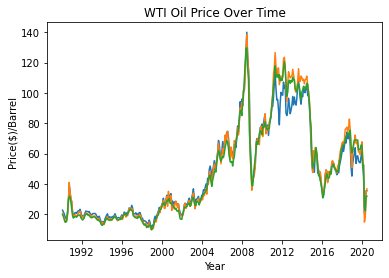

In [13]:
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.title('WTI Oil Price Over Time')
plt.plot(oil_data)
plt.rcParams["figure.figsize"] = [40,10]

In [14]:
WTI_ts=oil_data['WTI']
BRENT_ts=oil_data['BRENT']
ARAB_LIGHT_ts=oil_data['ARAB Light']

# Step 2: Determine Whether Time Series Data are Stationary 
## Step 2a: Plot the rolling means and rolling standard deviations of time series data
#### The time series is stationary if the means and SD remain constant with time
## Step 2b: Test for Stationarity in the time series data using the Dickey-Fuller Test.
#### If the p-value for this test is > .05 on the test, we accept the null hypothesis and conclude the time series is not stationary. 
#### If the p-value  for this test is <= .05, we reject the null hypothesis and conclude the time series is stationary.
#### If the ADF Statistic is much lower than the critical values, that also confirms the time series is stationary.

In [15]:
def test_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

## Stationarity Tests

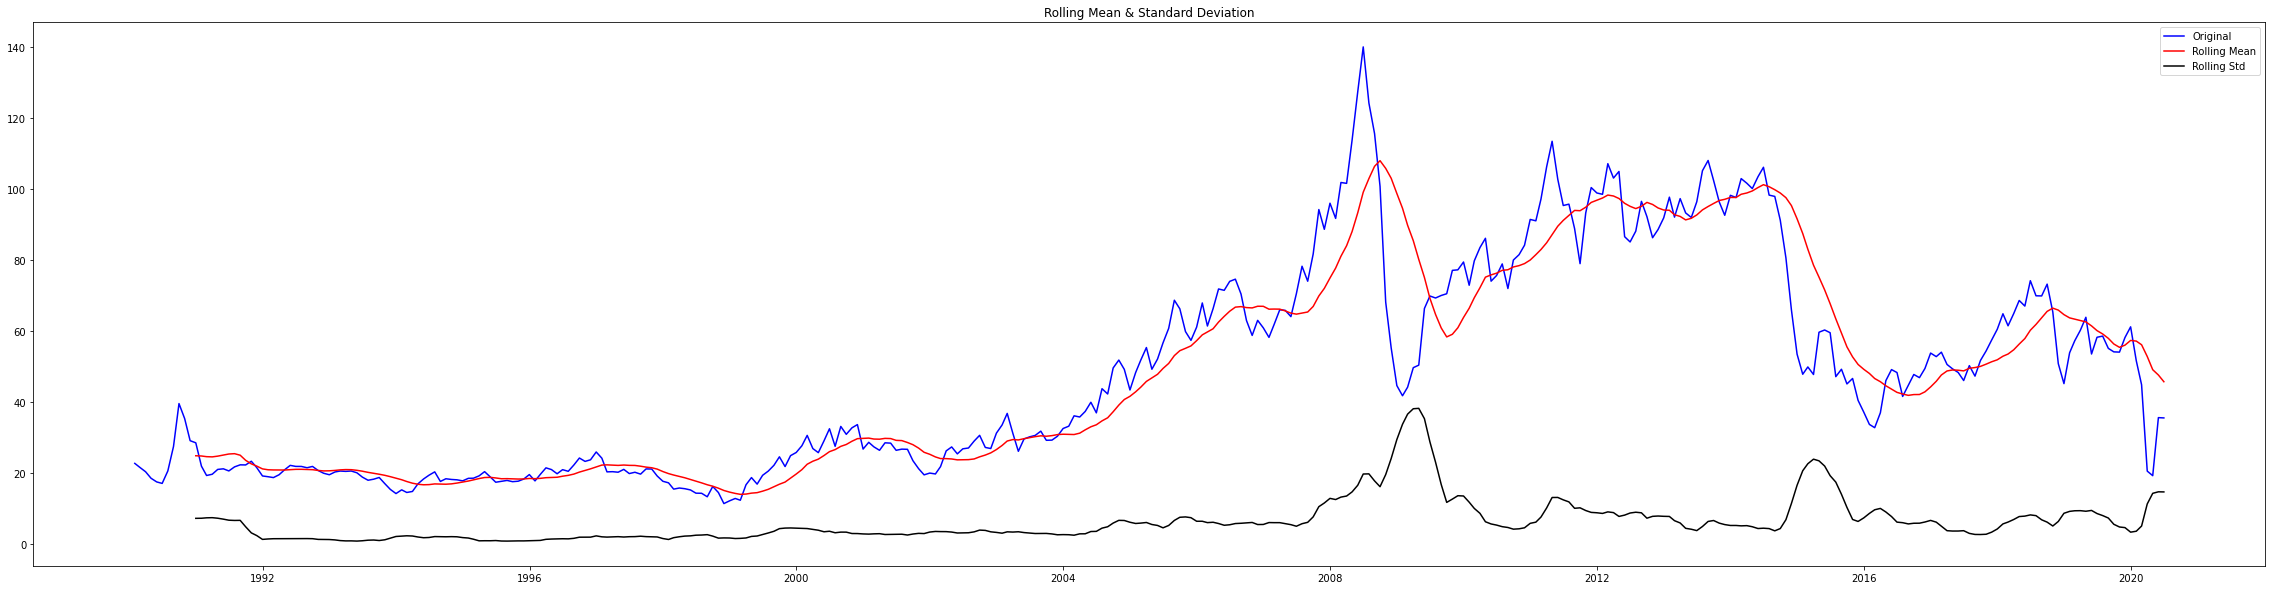

ADF Statistic: -2.2421730012268637
p-value: 0.19129653045751688
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [16]:
test_stationarity(WTI_ts)

### As we can see in the figure and Dickey Fuller test above, the WTI time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## BRENT Stationarity Tests

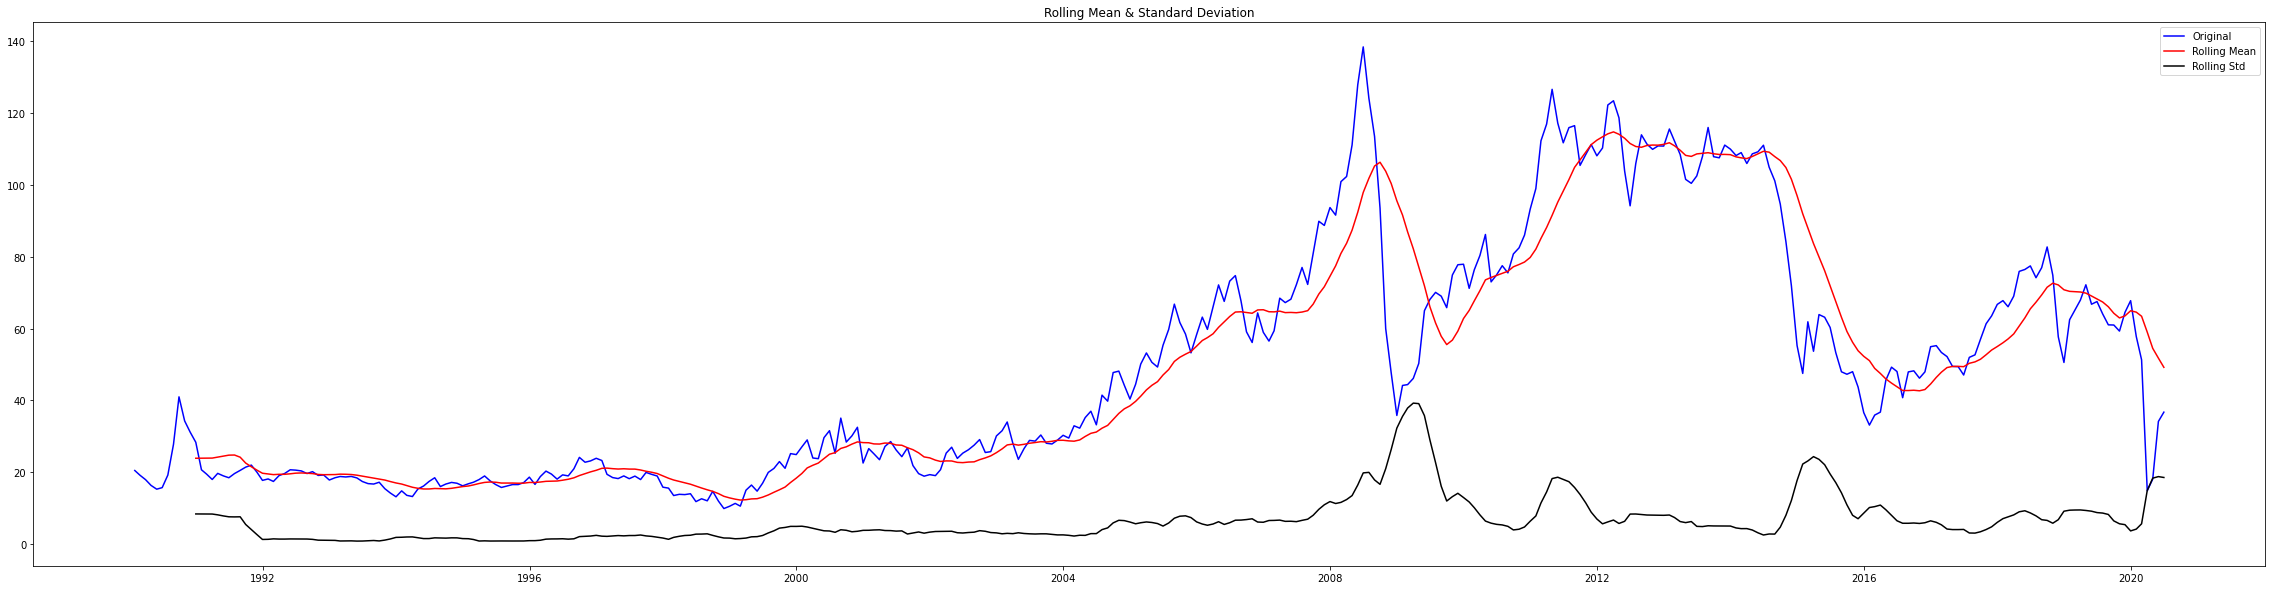

ADF Statistic: -2.204984301519696
p-value: 0.20444141916575093
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [17]:
test_stationarity(BRENT_ts)

### As we can see in the figure and Dickey Fuller test above, the BRENT time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## ARAB LIGHT Stationarity Tests

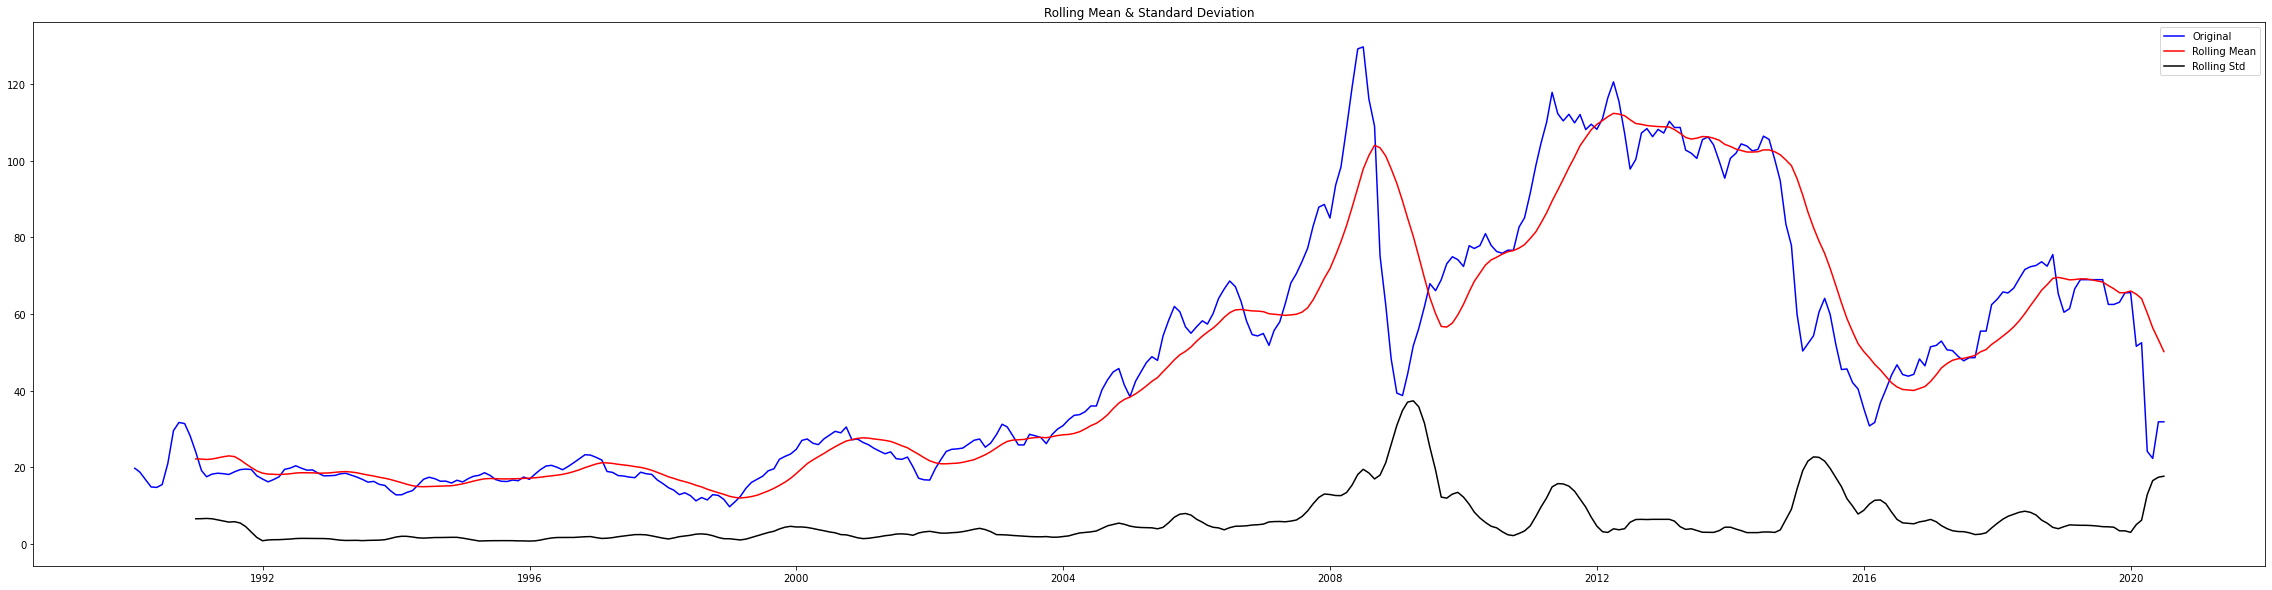

ADF Statistic: -1.5996968868051693
p-value: 0.483745732464127
Critical Values:
	1%: -3.4490114443793214
	5%: -2.8697627072503757
	10%: -2.5711506161673716


In [18]:
test_stationarity(ARAB_LIGHT_ts)

### As we can see in the figure and Dickey Fuller test above, the ARAB time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## Differencing the Data - Transform the data 

In [19]:
WTI_log = np.log(WTI_ts)
BRENT_log = np.log(BRENT_ts)
ARAB_LIGHT_log = np.log(ARAB_LIGHT_ts)
WTI_log_diff = WTI_log - WTI_log.shift()
WTI_log_diff.dropna(inplace=True)
BRENT_log_diff = BRENT_log - BRENT_log.shift()
BRENT_log_diff.dropna(inplace=True)
ARAB_LIGHT_log_diff = ARAB_LIGHT_log - ARAB_LIGHT_log.shift()
ARAB_LIGHT_log_diff.dropna(inplace=True)

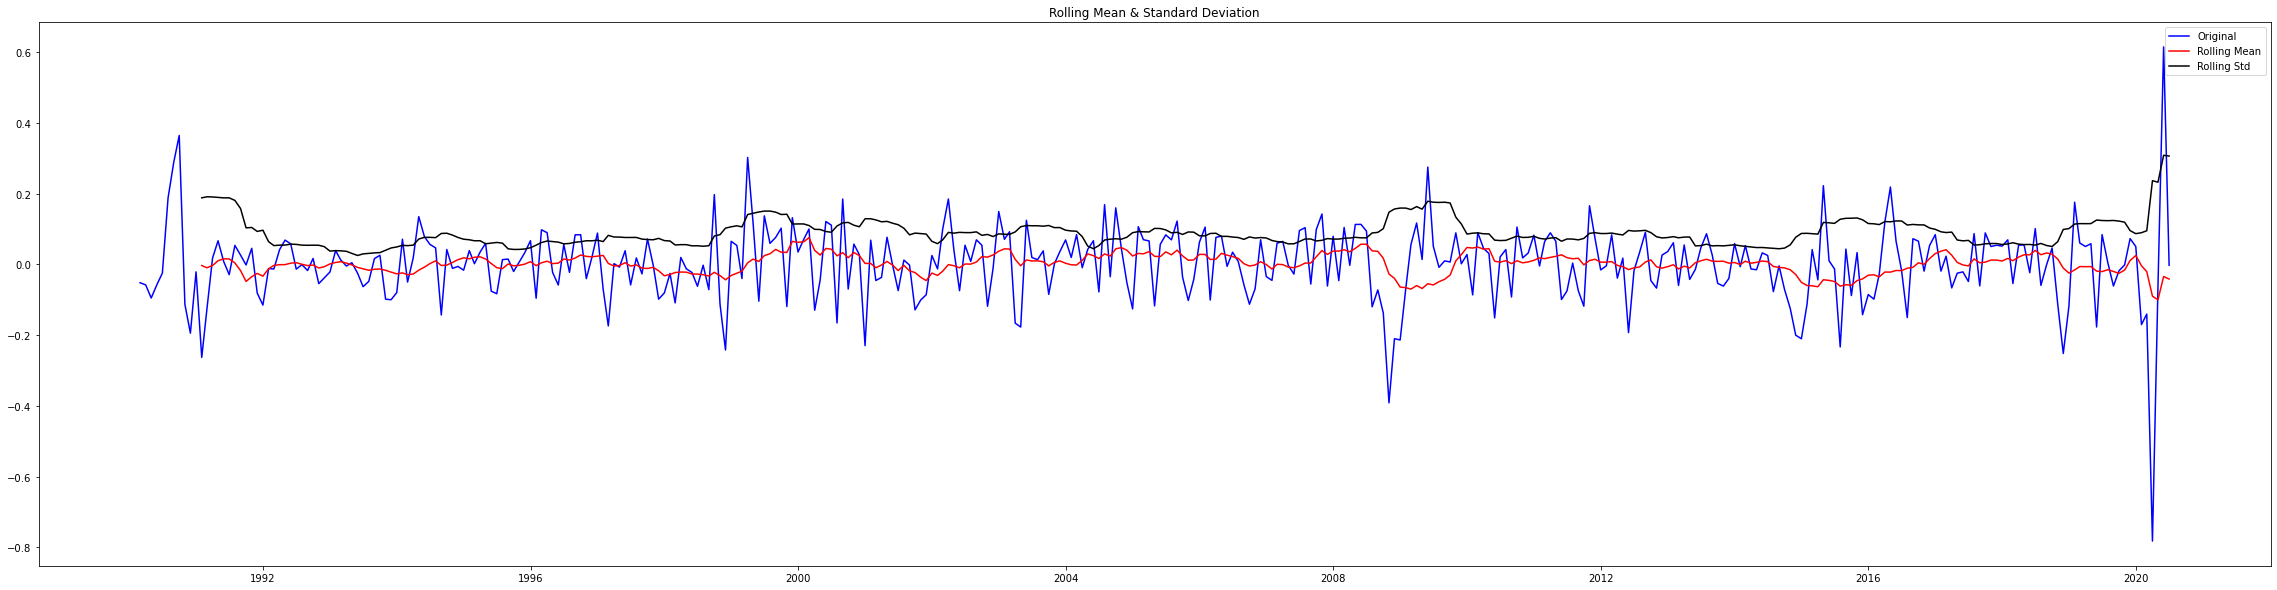

ADF Statistic: -8.695375340950026
p-value: 3.938069063496756e-14
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [20]:
test_stationarity(WTI_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced WTI time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

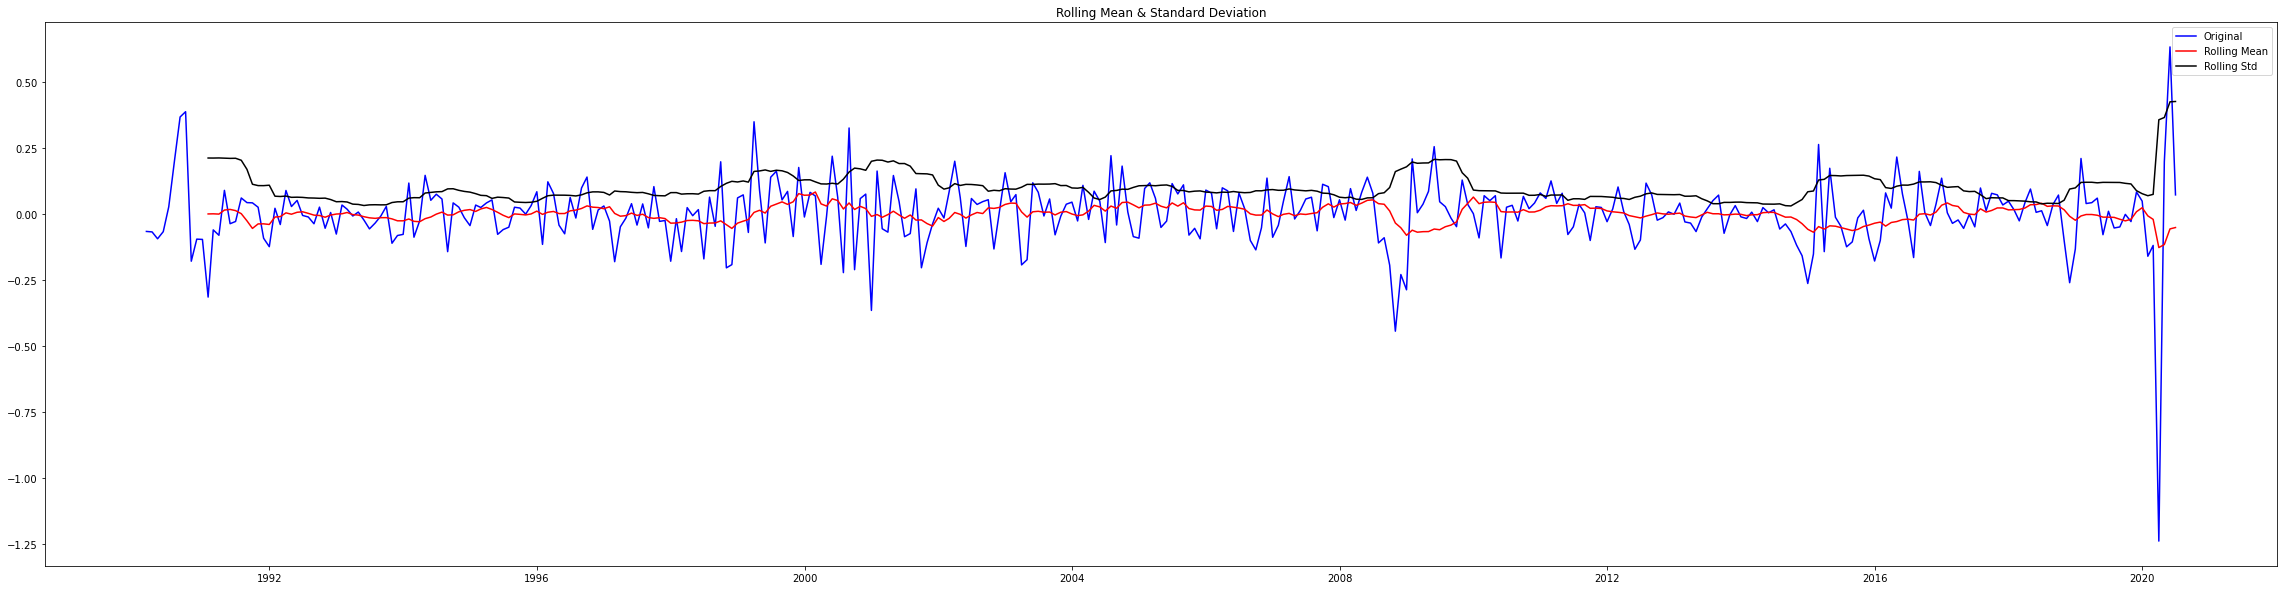

ADF Statistic: -14.151908118282382
p-value: 2.1545202896063786e-26
Critical Values:
	1%: -3.448493650810824
	5%: -2.8695352280356556
	10%: -2.5710293341377715


In [21]:
test_stationarity(BRENT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced BRENT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

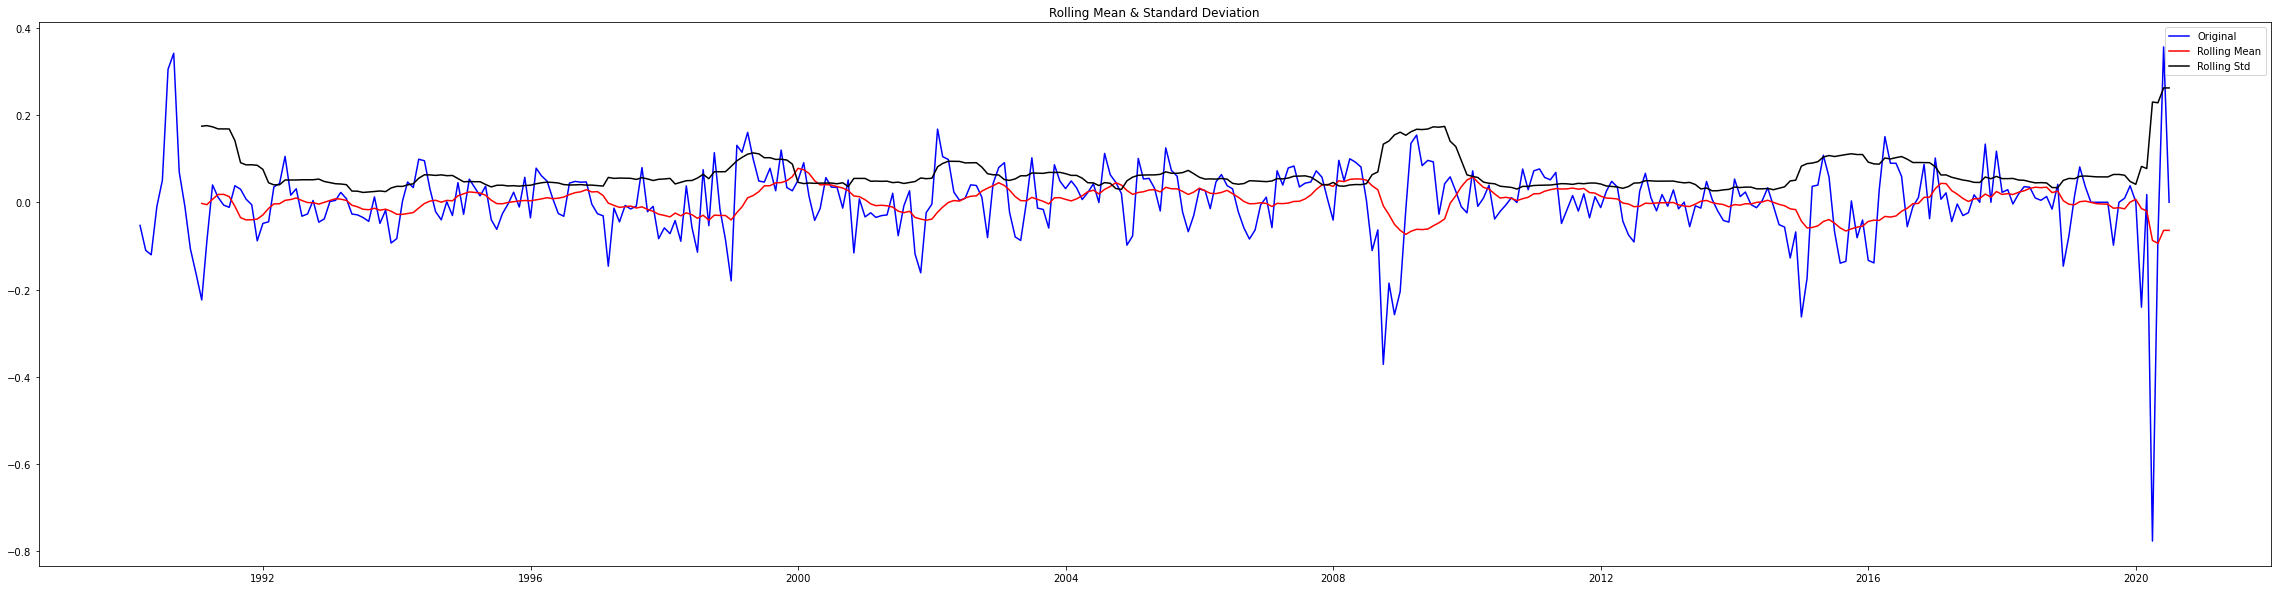

ADF Statistic: -10.60188979610204
p-value: 6.140853297907404e-19
Critical Values:
	1%: -3.4485948978753314
	5%: -2.86957971128312
	10%: -2.571053050314224


In [22]:
test_stationarity(ARAB_LIGHT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced ARAB LIGHT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

# Step 3: Explore Autocorrelation Functioms (ACF) and Partial Autocorrelation Functions (PACF)

### ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

### PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

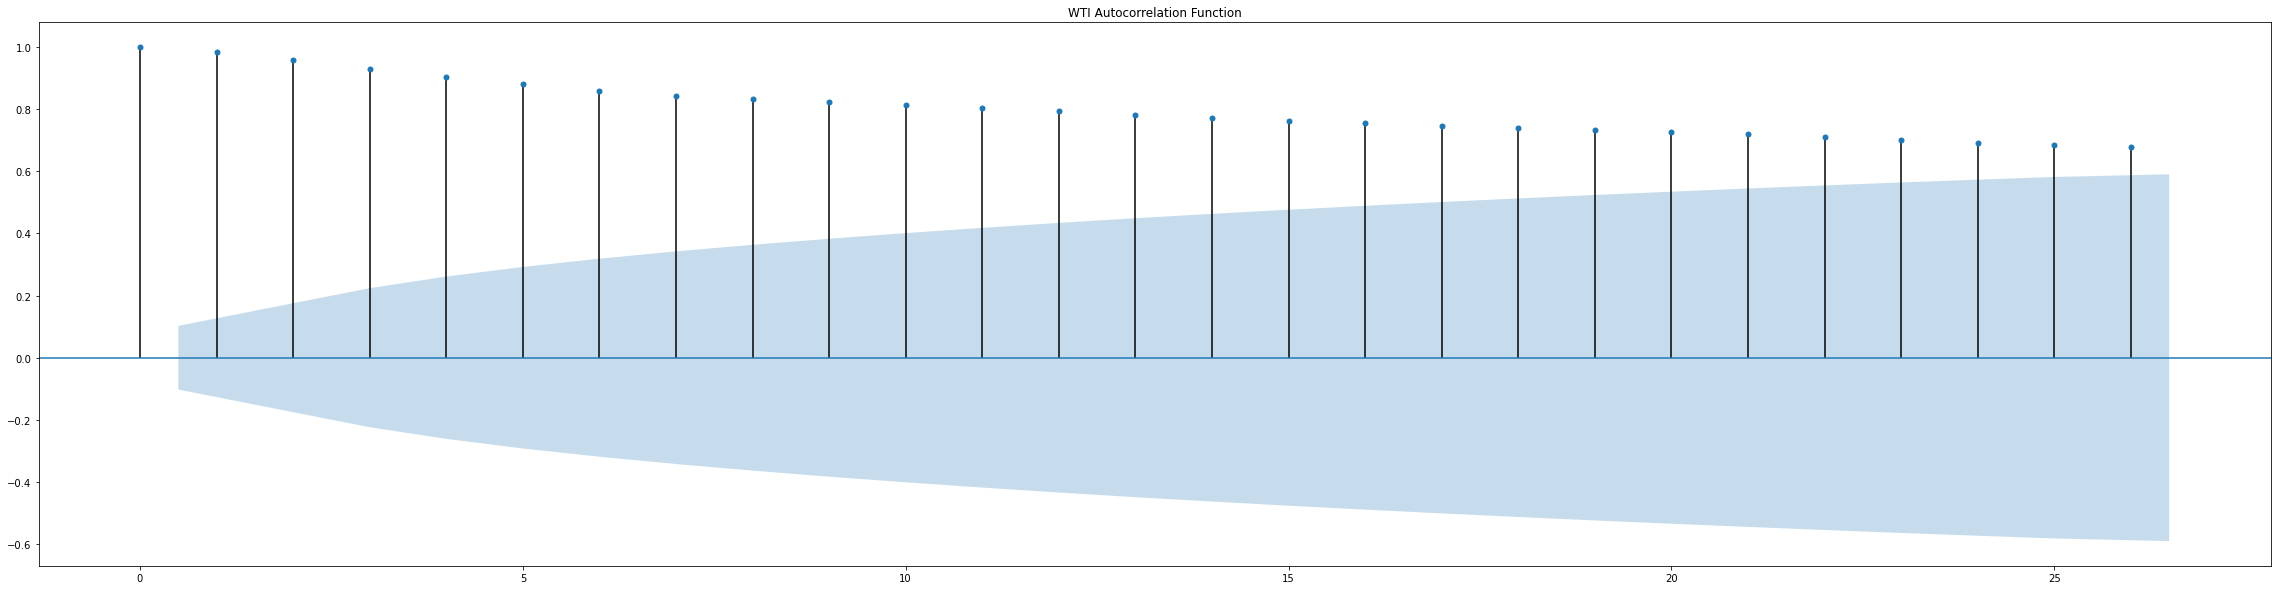

In [23]:
plot_acf(WTI_ts)
plt.title('WTI Autocorrelation Function')
plt.show()

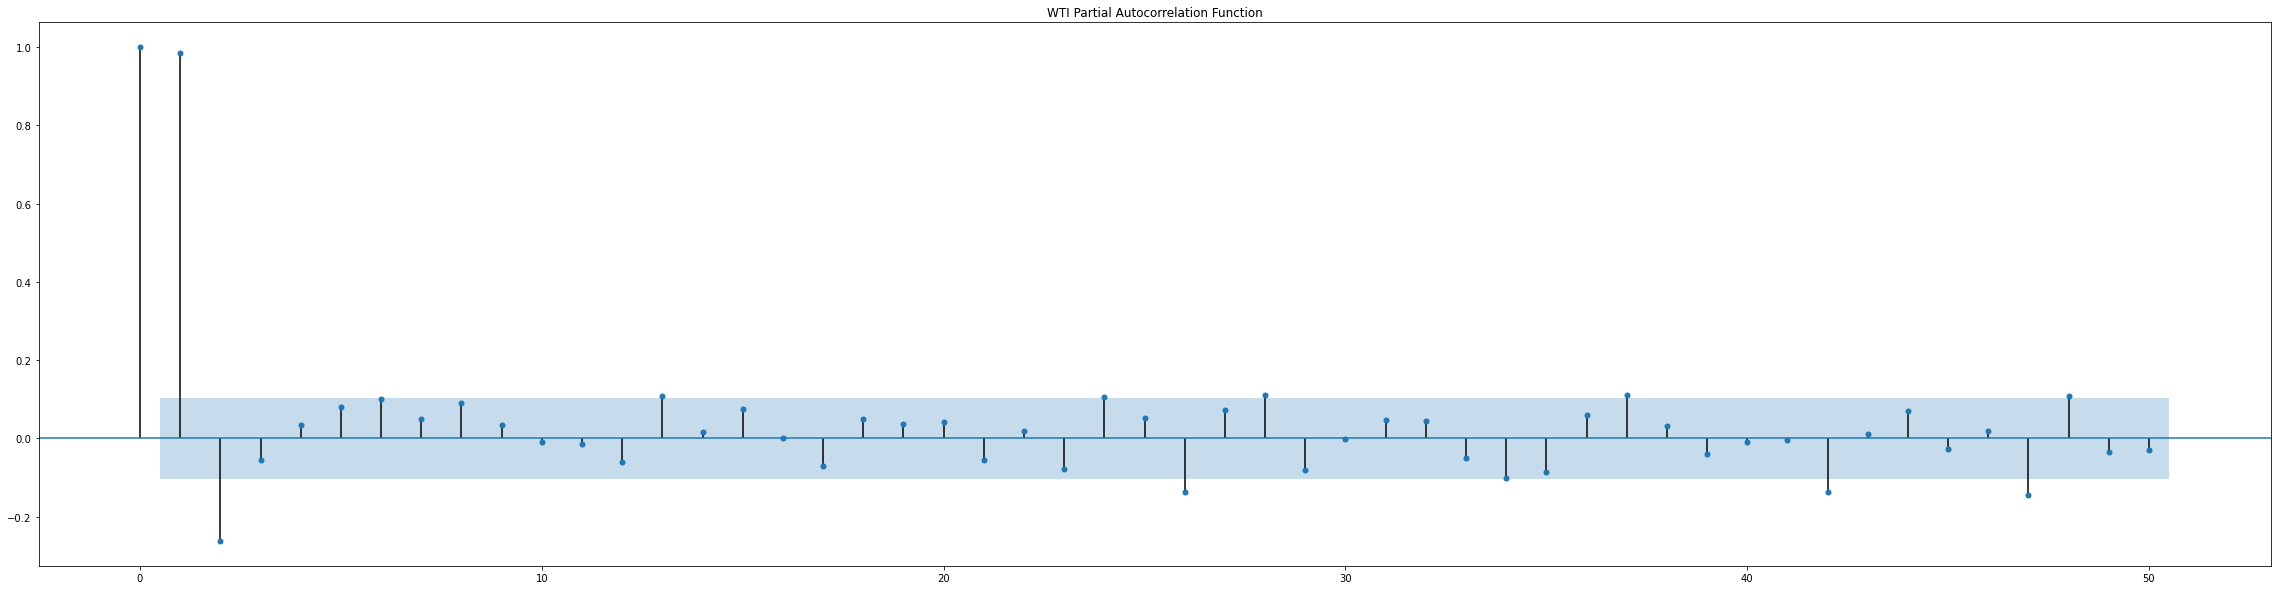

In [24]:
plot_pacf(WTI_ts, lags=50)
plt.title('WTI Partial Autocorrelation Function')
plt.show()

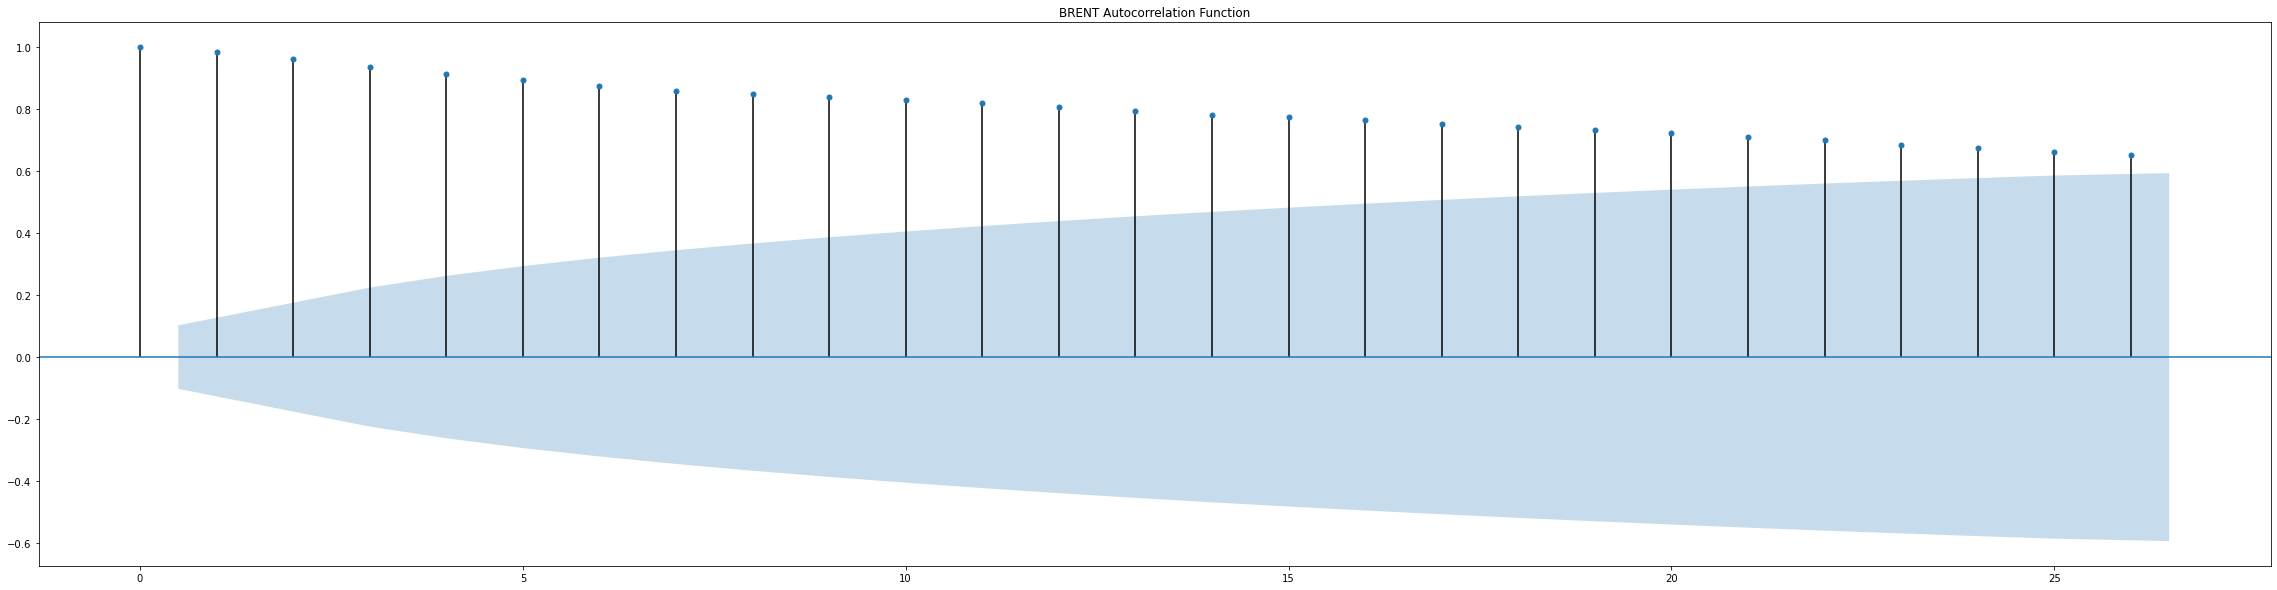

In [25]:
plot_acf(BRENT_ts)
plt.title('BRENT Autocorrelation Function')
plt.show()

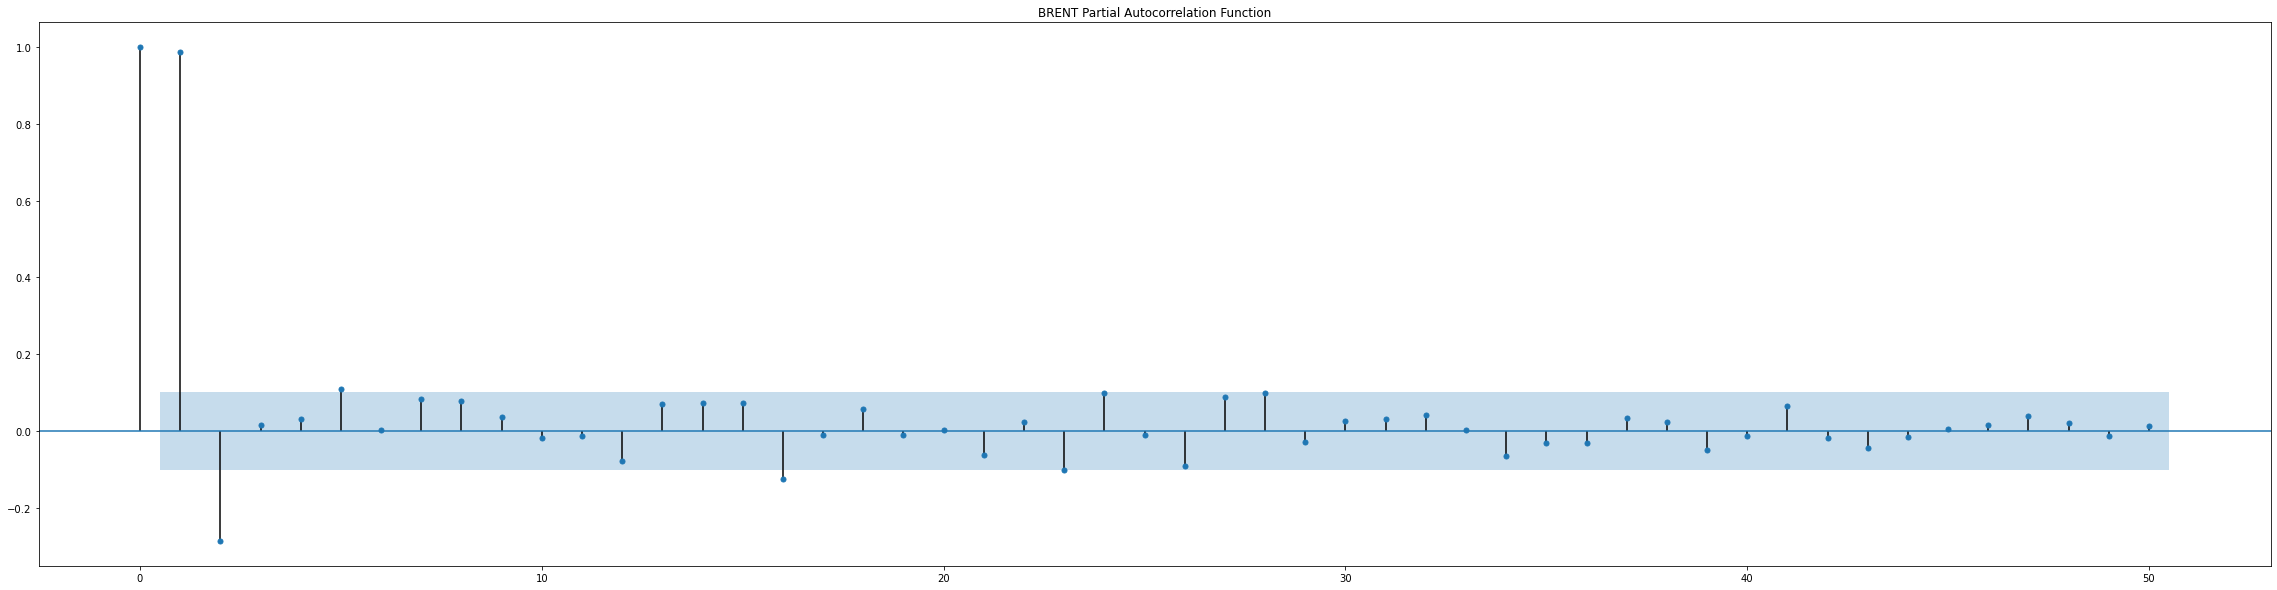

In [26]:
plot_pacf(BRENT_ts, lags=50)
plt.title('BRENT Partial Autocorrelation Function')
plt.show()

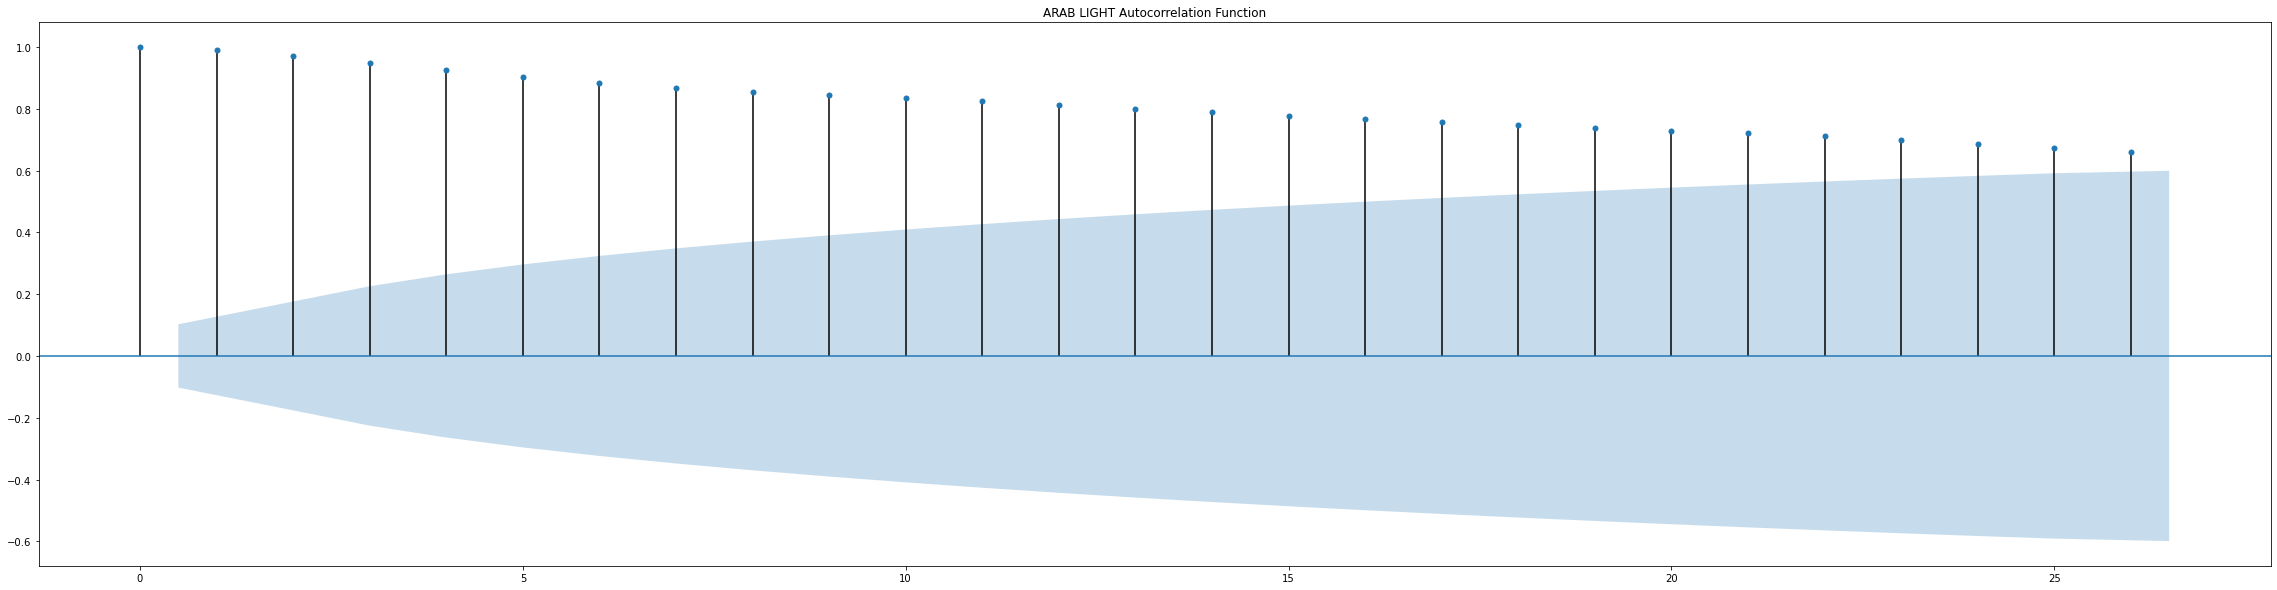

In [27]:
plot_acf(ARAB_LIGHT_ts)
plt.title('ARAB LIGHT Autocorrelation Function')
plt.show()

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


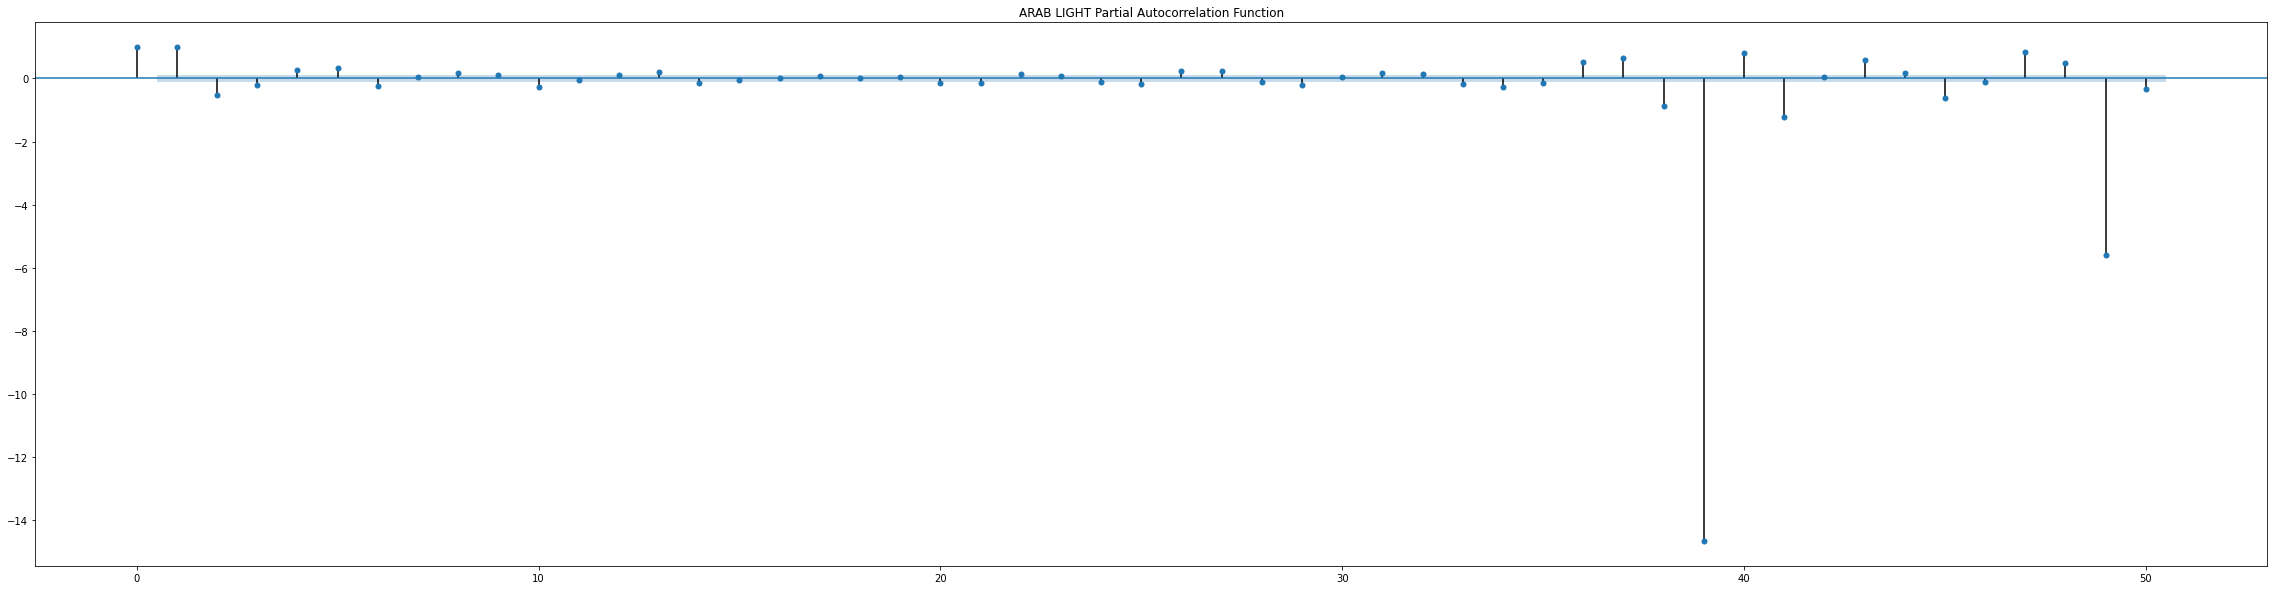

In [28]:
plot_pacf(ARAB_LIGHT_ts, lags=50)
plt.title('ARAB LIGHT Partial Autocorrelation Function')
plt.show()

# ARIMA model

## Complete procedure for evaluating a grid of ARIMA hyperparameters to evaluate combinations of p, d and q values for an ARIMA model

### Evaluating grid of ARIMA hyperparatmers for WTI

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = WTI_ts
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1346.983
ARIMA(0, 0, 1) MSE=434.022
ARIMA(0, 1, 0) MSE=41.253
ARIMA(0, 1, 1) MSE=40.648
ARIMA(0, 1, 2) MSE=41.465
ARIMA(0, 2, 0) MSE=70.908
ARIMA(0, 2, 1) MSE=43.656
ARIMA(0, 2, 2) MSE=41.018
ARIMA(1, 0, 0) MSE=40.869
ARIMA(1, 0, 1) MSE=40.267
ARIMA(1, 0, 2) MSE=41.091
ARIMA(1, 1, 0) MSE=41.162
ARIMA(1, 1, 1) MSE=41.656
ARIMA(1, 2, 0) MSE=60.603
ARIMA(1, 2, 1) MSE=41.559
ARIMA(2, 0, 0) MSE=40.853
ARIMA(2, 0, 1) MSE=41.488
ARIMA(2, 1, 0) MSE=41.911
ARIMA(2, 1, 1) MSE=41.923
ARIMA(2, 1, 2) MSE=43.749
ARIMA(2, 2, 0) MSE=56.712
ARIMA(2, 2, 1) MSE=42.361
ARIMA(4, 0, 0) MSE=41.980
ARIMA(4, 0, 1) MSE=42.389
ARIMA(4, 1, 0) MSE=42.842
ARIMA(4, 1, 1) MSE=43.090
ARIMA(4, 1, 2) MSE=43.632
ARIMA(4, 2, 0) MSE=53.123
ARIMA(4, 2, 1) MSE=43.286
ARIMA(6, 0, 0) MSE=42.874
ARIMA(6, 0, 1) MSE=42.870
ARIMA(6, 0, 2) MSE=43.613
ARIMA(6, 1, 0) MSE=43.342
ARIMA(6, 1, 1) MSE=43.565
ARIMA(6, 1, 2) MSE=45.005
ARIMA(6, 2, 0) MSE=51.930
ARIMA(6, 2, 1) MSE=43.752
ARIMA(8, 0, 0) MSE=42.905
ARIMA(8, 

### Evaluating grid of ARIMA hyperparameters for BRENT

In [ ]:
series = BRENT_ts
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

### Evaluating grid of ARIMA hyperparatmers for ARAB LIGHT

In [ ]:
series = ARAB_LIGHT_ts
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
# fit model
WTI_model = ARIMA(WTI_ts, order=(5,1,0))
WTI_model_fit = WTI_model.fit(disp=0)
print(WTI_model_fit.summary())
# plot residual errors
WTI_residuals = DataFrame(WTI_model_fit.resid)
WTI_residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(WTI_residuals.describe())

In [ ]:
X = WTI_ts.values
size = int(len(X) * 0.66)
WTI_train, WTI_test = X[0:size], X[size:len(X)]
WTI_history = [x for x in train]
WTI_predictions = list()
for t in range(len(WTI_test)):
	WTI_model = ARIMA(WTI_history, order=(5,1,0))
	WTI_model_fit = WTI_model.fit(disp=0)
	WTI_output = WTI_model_fit.forecast()
	WTI_yhat = WTI_output[0]
	WTI_predictions.append(yhat)
	WTI_obs = WTI_test[t]
	WTI_history.append(WTI_obs)
	print('predicted=%f, expected=%f' % (WTI_yhat, WTI_obs))
WTI_error = mean_squared_error(WTI_test, WTI_predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(WTI_test)
plt.plot(WTI_predictions, color='red')
plt.show()

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


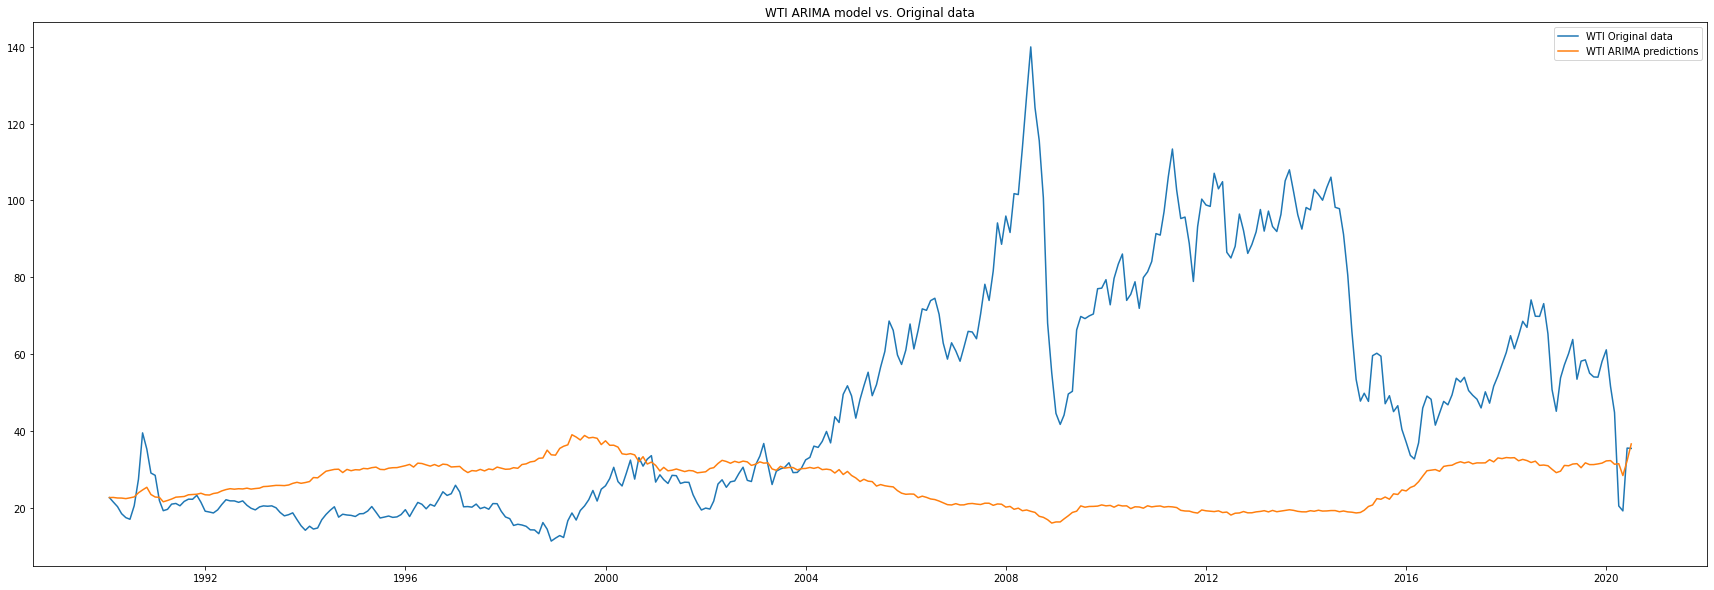

In [153]:
WTI_decomposition = seasonal_decompose(WTI_log) 
WTI_model = ARIMA(WTI_log, order=(2,1,2))
WTI_results = WTI_model.fit(disp=-1)
WTI_predictions_ARIMA_diff = pd.Series(WTI_results.fittedvalues, copy=True)
WTI_predictions_ARIMA_diff_cumsum = WTI_predictions_ARIMA_diff.cumsum()
WTI_predictions_ARIMA_log = pd.Series(WTI_log['Value'].iloc[0], index=WTI_log.index)
WTI_predictions_ARIMA_log = WTI_predictions_ARIMA_log.add(WTI_predictions_ARIMA_diff_cumsum, fill_value=0)
WTI_predictions_ARIMA = np.exp(WTI_predictions_ARIMA_log)
plt.plot(WTI_data, label = 'WTI Original data')
plt.plot(WTI_predictions_ARIMA, label = 'WTI ARIMA predictions')
plt.legend(loc = 'best')
plt.title('WTI ARIMA model vs. Original data')
plt.show()

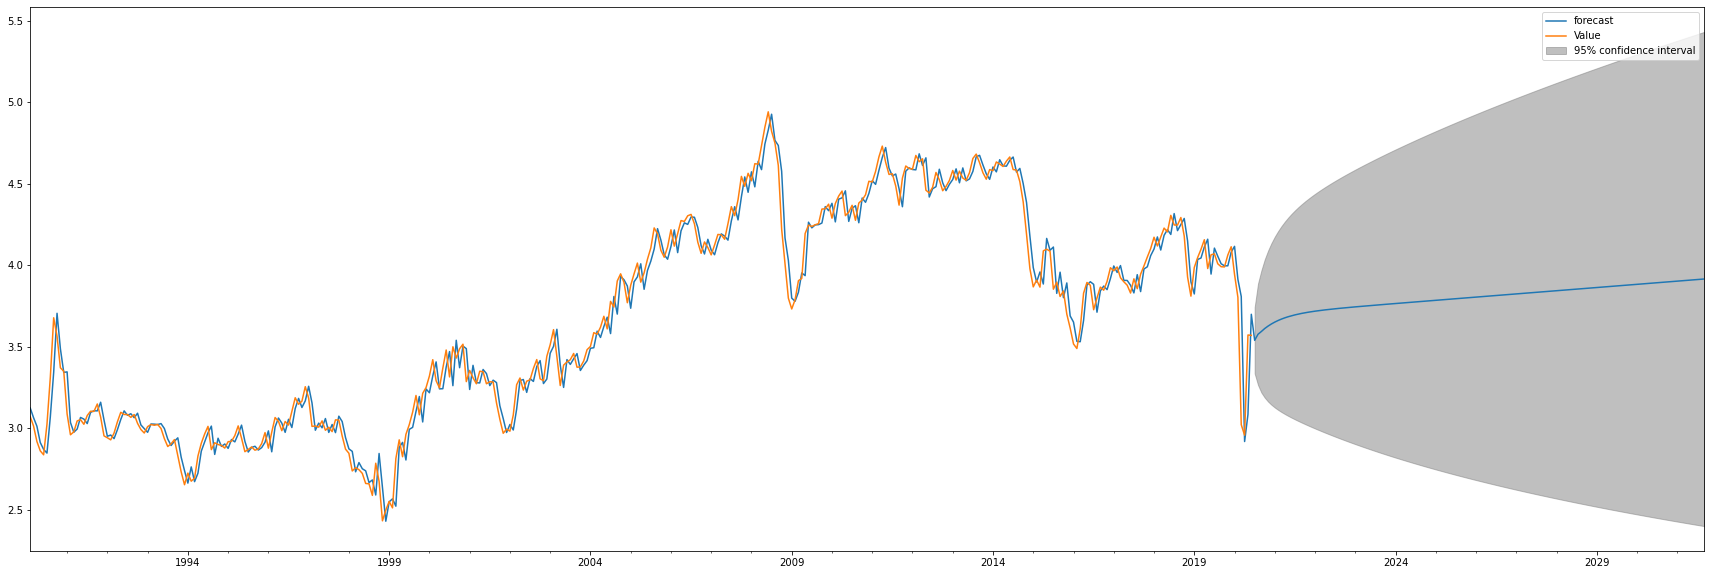

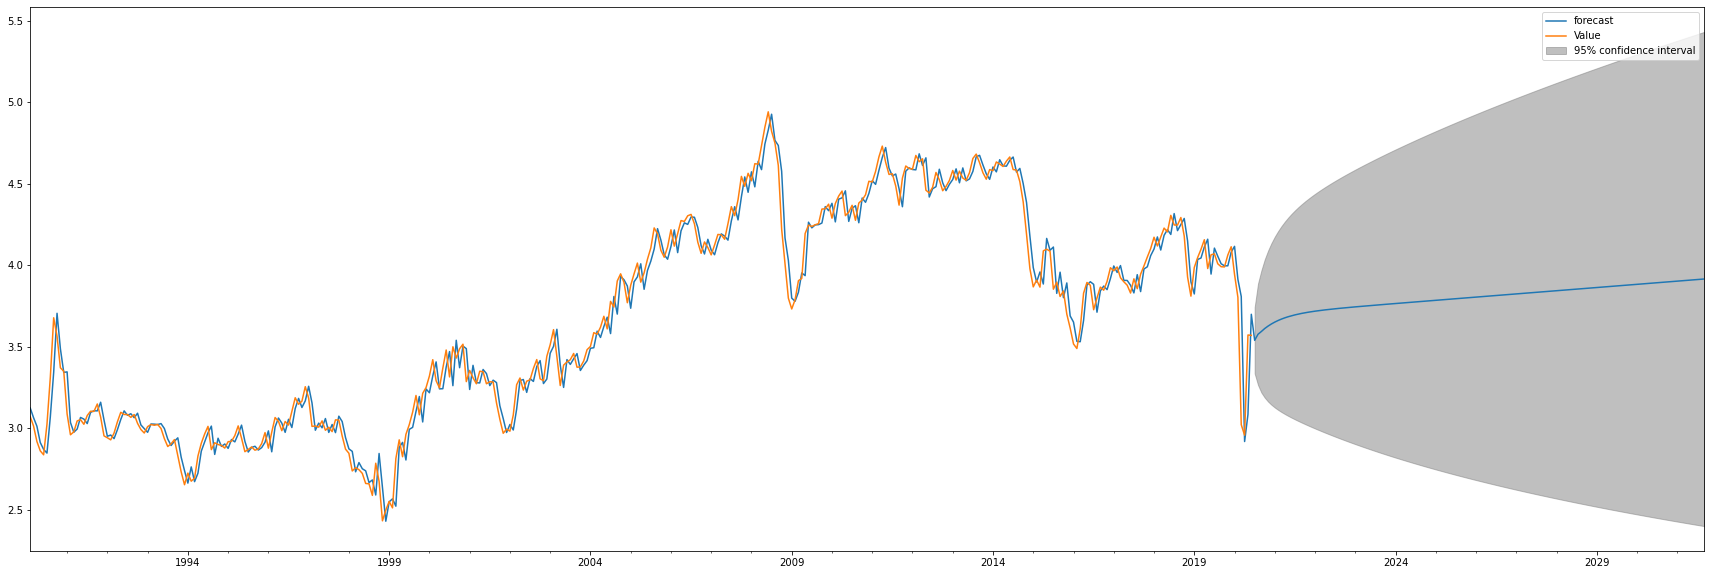

In [156]:
WTI_results.plot_predict(1,500)

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


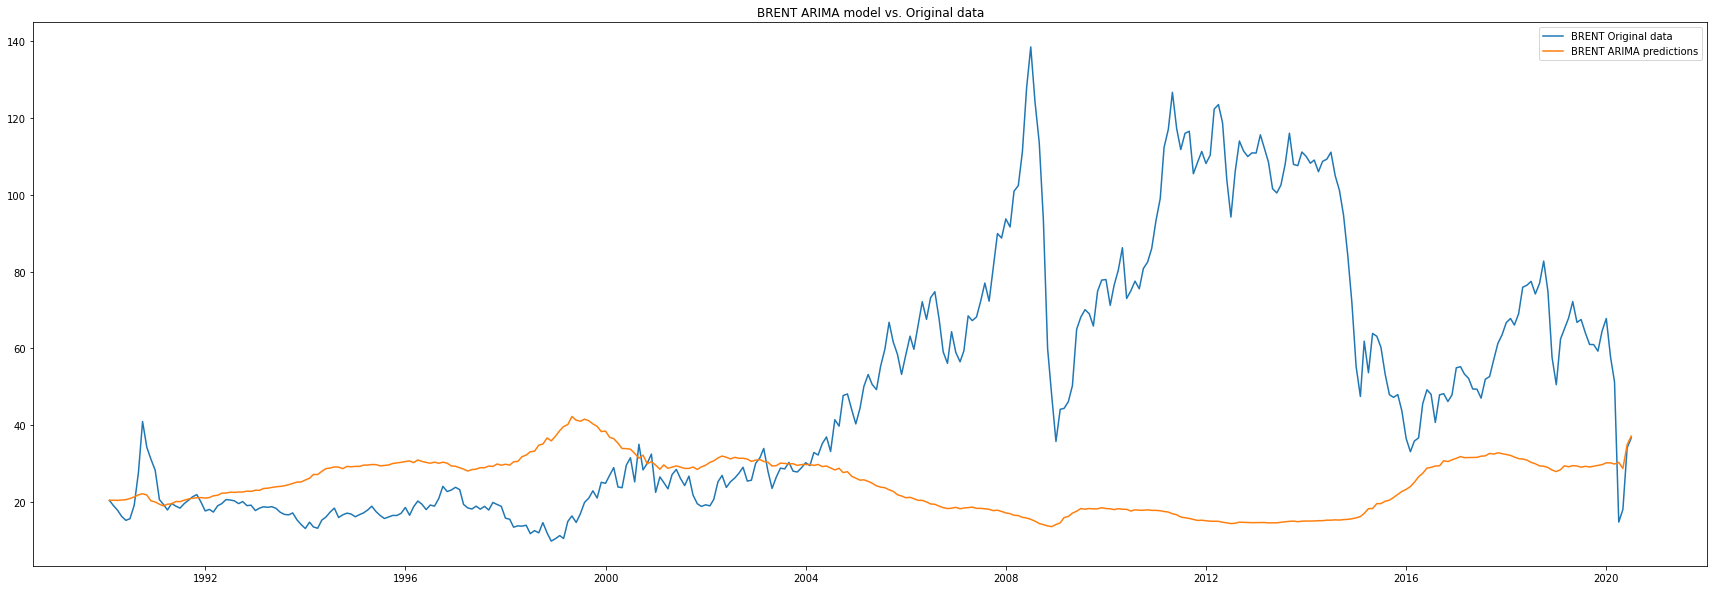

In [157]:
BRENT_decomposition = seasonal_decompose(BRENT_log) 
BRENT_model = ARIMA(BRENT_log, order=(2,1,2))
BRENT_results = BRENT_model.fit(disp=-1)
BRENT_predictions_ARIMA_diff = pd.Series(BRENT_results.fittedvalues, copy=True)
BRENT_predictions_ARIMA_diff_cumsum = BRENT_predictions_ARIMA_diff.cumsum()
BRENT_predictions_ARIMA_log = pd.Series(BRENT_log['Value'].iloc[0], index=BRENT_log.index)
BRENT_predictions_ARIMA_log = BRENT_predictions_ARIMA_log.add(BRENT_predictions_ARIMA_diff_cumsum, fill_value=0)
BRENT_predictions_ARIMA = np.exp(BRENT_predictions_ARIMA_log)
plt.plot(BRENT_data, label = 'BRENT Original data')
plt.plot(BRENT_predictions_ARIMA, label = 'BRENT ARIMA predictions')
plt.legend(loc = 'best')
plt.title('BRENT ARIMA model vs. Original data')
plt.show()

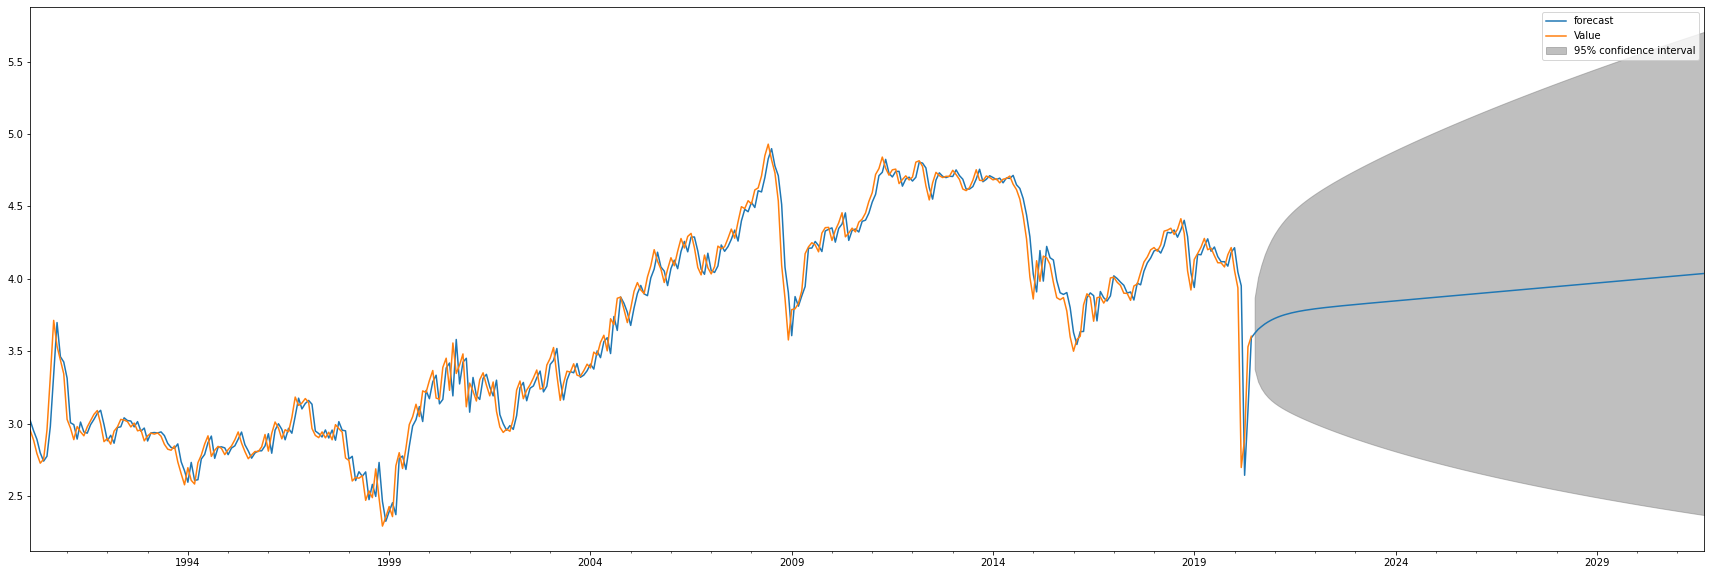

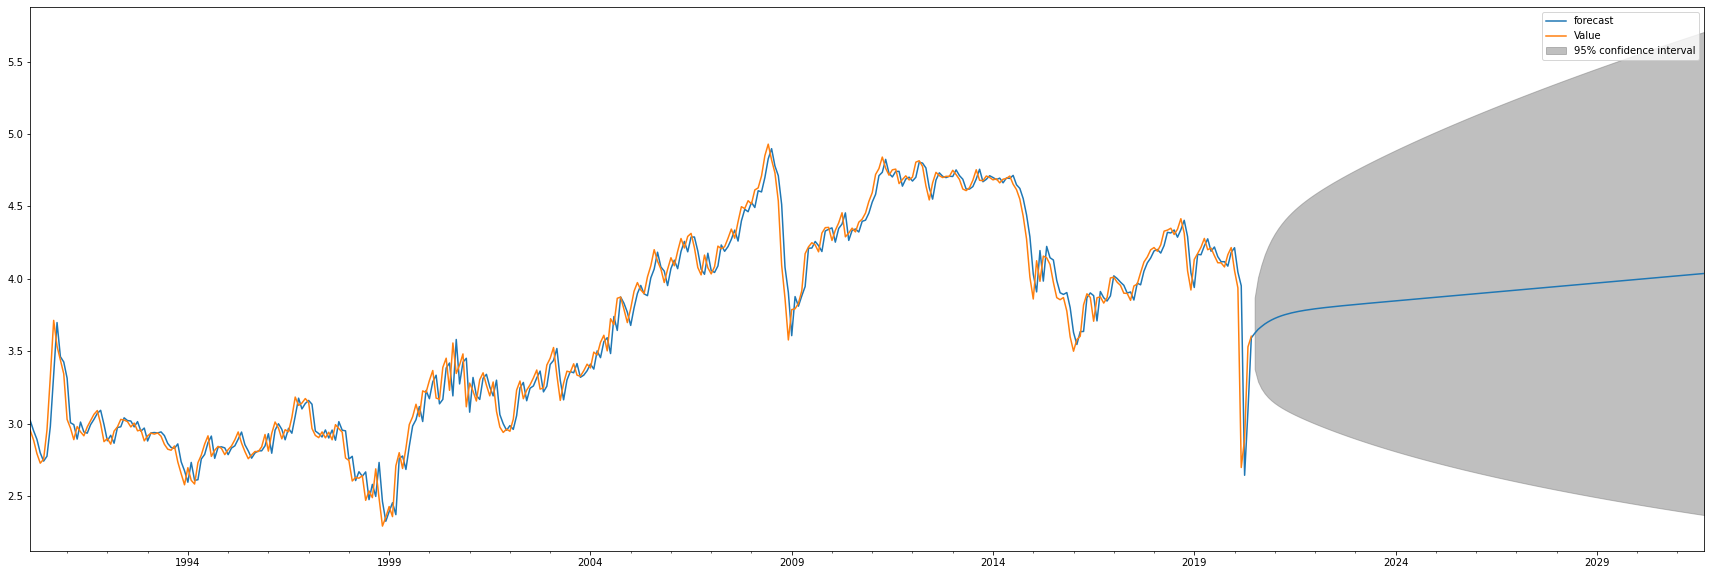

In [158]:
BRENT_results.plot_predict(1,500)